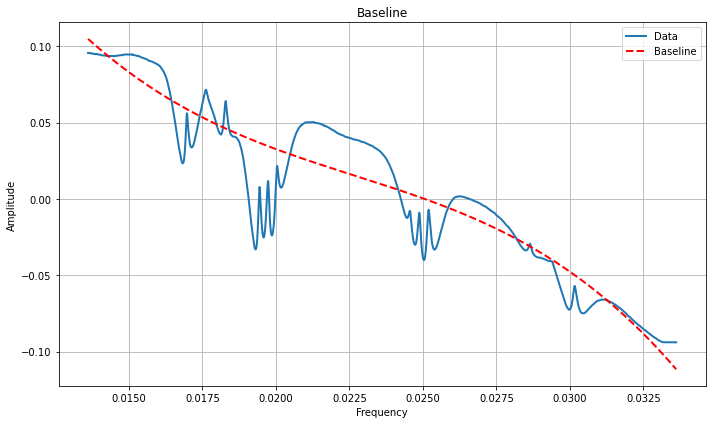

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

df = pd.read_csv('C:\\Users\\HP\\Desktop\\Bonn\\My Courses\\Advanced Lab Course\\A246 Laser Spectroscopy\\A246 Task 4 Data\\A246 Task 4 Data\\0,512.CSV')

y_array = df["DPO4104"][19:].to_numpy()
x_array = df["Model"][19:].to_numpy()


dat = np.array(y_array, dtype=float)
x = np.array(x_array, dtype=float)
dat = dat[::-1]


def baseline_model(x, offset, linear, quadratic, cubic):
    return offset + linear * x + quadratic * x**2 + cubic * x**3

popt_baseline, _ = curve_fit(baseline_model, x, dat)

baseline_curve = baseline_model(x, *popt_baseline)

plt.figure(figsize=(10, 6))
plt.plot(x, dat, label='Data', linewidth=2)
plt.plot(x, baseline_curve, label='Baseline', color='red', linestyle='dashed', linewidth=2)
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Baseline')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



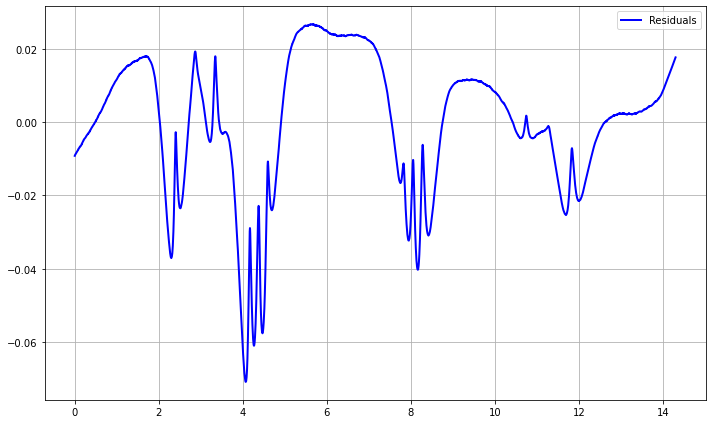

In [2]:
residuals = dat - baseline_curve
x-=min(x)
x=x*715167.18*1e-3
plt.figure(figsize=(10, 6))
plt.plot(x, residuals, label='Residuals', color='blue', linewidth=2)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [5]:
residuals-=min(residuals)

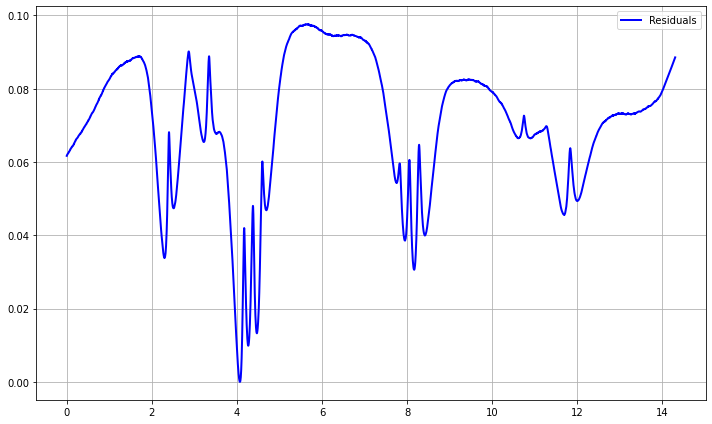

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(x, residuals, label='Residuals', color='blue', linewidth=2)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [10]:
dataa={'Rel_freq':x, 'Rel_power': np.array(residuals)}
dataframe = pd.DataFrame(data=dataa)
dataframe.to_csv('C:\\Users\\HP\\Desktop\\forlor3.CSV')

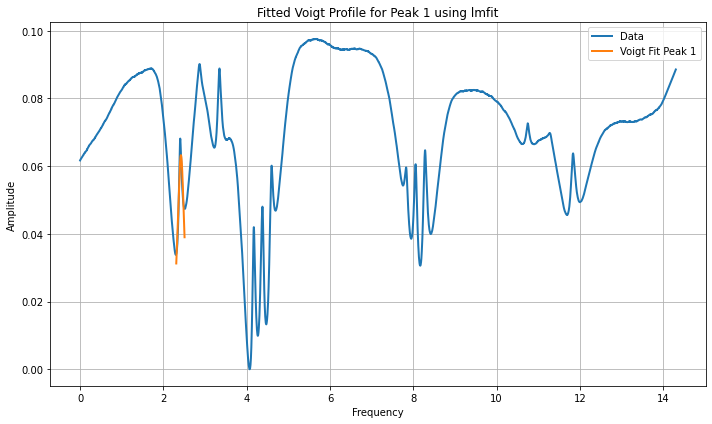

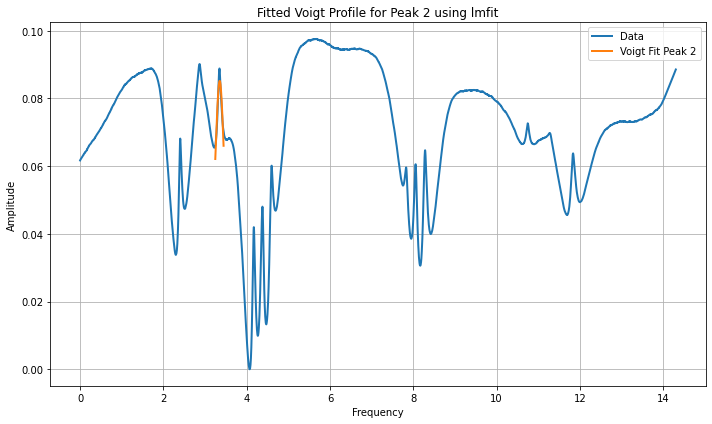

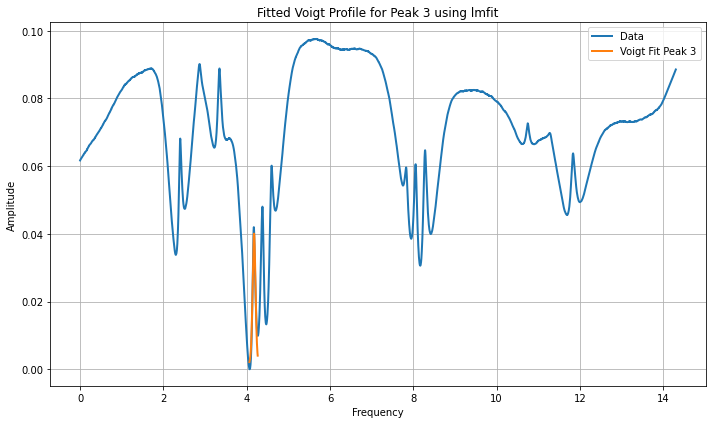

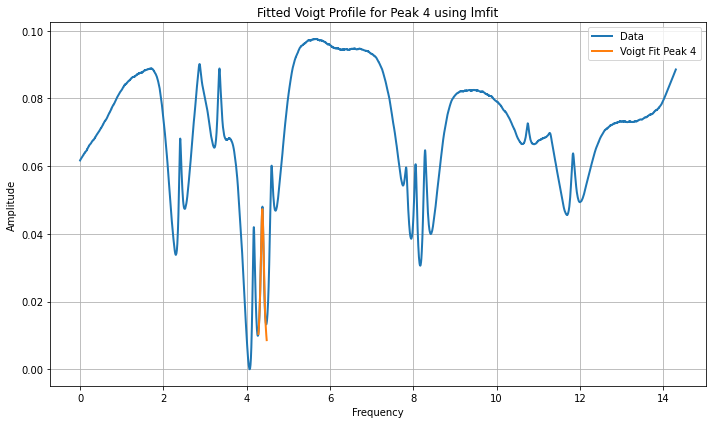

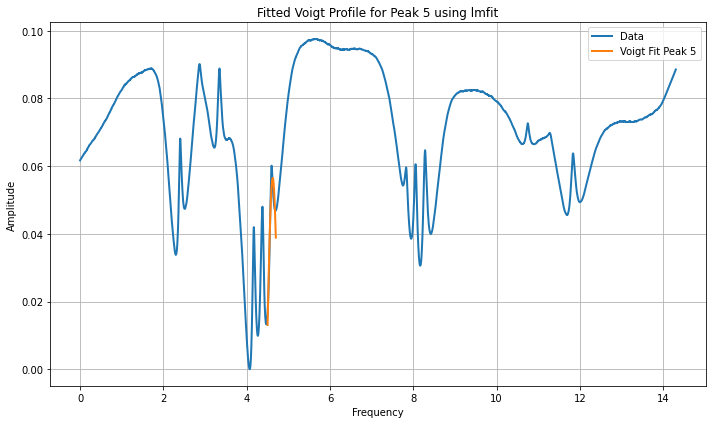

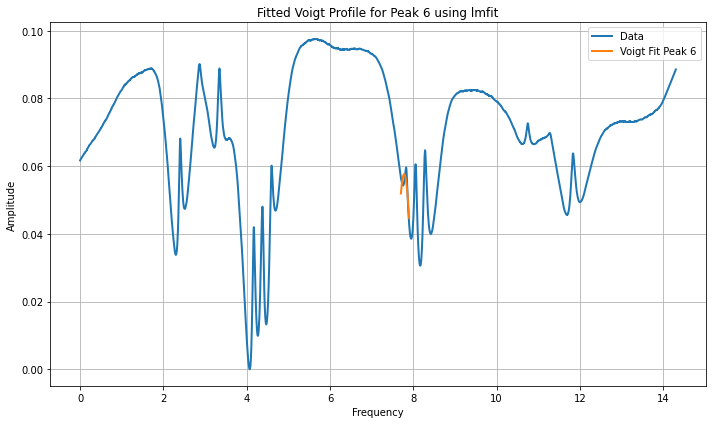

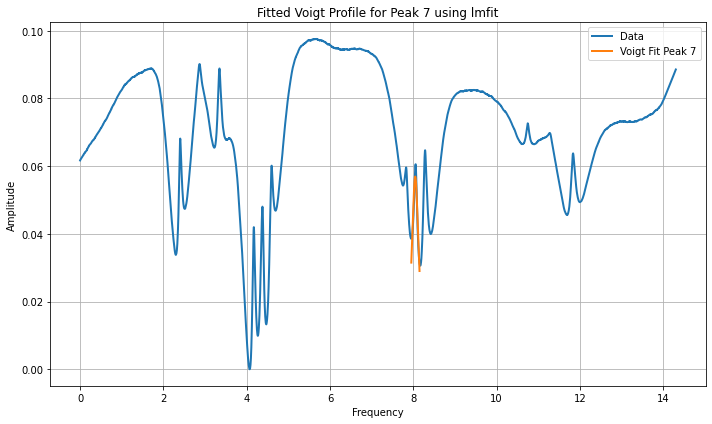

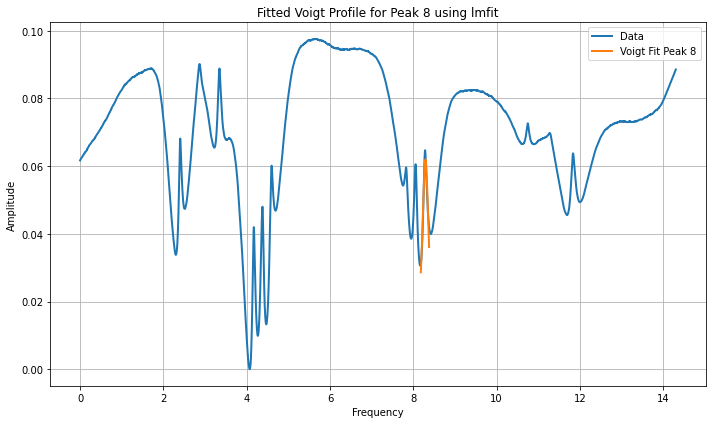

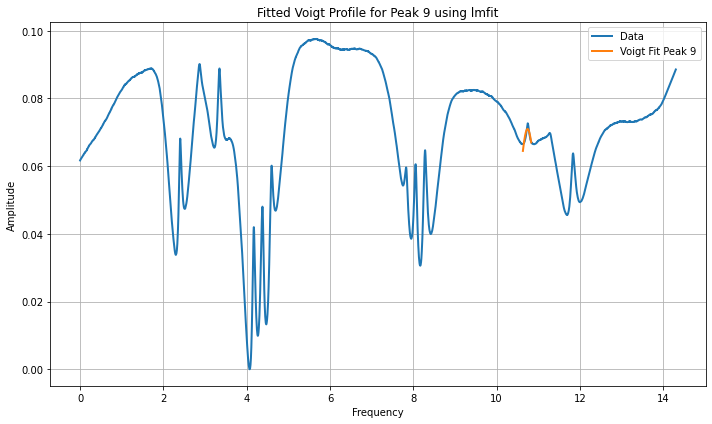

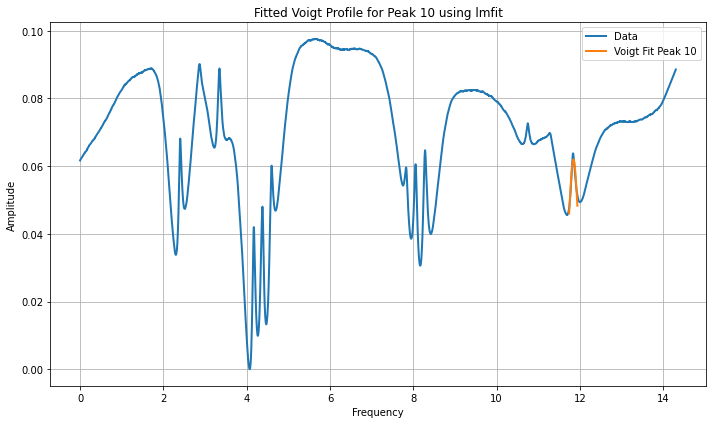

Fit results for Peak 1:
[[Model]]
    Model(voigt)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 3848
    # data points      = 140
    # variables        = 4
    chi-square         = 0.00181349
    reduced chi-square = 1.3334e-05
    Akaike info crit   = -1567.58018
    Bayesian info crit = -1555.81361
    R-squared          = 0.87171938
[[Variables]]
    amplitude:  27.2327227 +/- 141671.323 (520224.60%) (init = 0.06815024)
    center:     2.42029084 +/- 0.00107501 (0.04%) (init = 2.408)
    sigmaL:     0.11042933 +/- 0.01706420 (15.45%) (init = 0.01)
    sigmaG:     3.2151e-04 +/- 1.67657206 (521471.07%) (init = 0.01)
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigmaG) = -1.0000
    C(amplitude, sigmaL) = +0.9890
    C(sigmaL, sigmaG)    = -0.9890
    C(center, sigmaL)    = +0.2450
    C(amplitude, center) = +0.2187
    C(center, sigmaG)    = -0.2187
Fit results for Peak 2:
[[Model]]
    Model(voigt)
[[Fit Statistics]]
    # 

In [12]:
from lmfit import Model
from scipy.special import wofz

def voigt(x, amplitude, center, sigmaL, sigmaG):
    z = ((x - center) + 1j * sigmaL) / (sigmaG * np.sqrt(2))
    return amplitude * np.real(wofz(z))

peak_centers = [2.408, 3.345, 4.165, 4.38, 4.6, 7.8, 8.05, 8.28, 10.73, 11.84]
peak_indices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]  

roi_width = 0.1  
fit_results = []

for idx, center in enumerate(peak_centers):
 
    roi_indices = (x >= center - roi_width) & (x <= center + roi_width)
    roi_x = x[roi_indices]
    roi_residuals = residuals[roi_indices]

    initial_amplitude = max(roi_residuals)
    initial_center = center
    initial_sigmaL = 0.01  
    initial_sigmaG = 0.01  


    peak_model = Model(voigt)
    peak_model.set_param_hint('amplitude', value=initial_amplitude)
    peak_model.set_param_hint('center', value=initial_center)
    peak_model.set_param_hint('sigmaL', value=initial_sigmaL)
    peak_model.set_param_hint('sigmaG', value=initial_sigmaG)

    peak_fit = peak_model.fit(roi_residuals, x=roi_x)

    fit_results.append(peak_fit)

    plt.figure(figsize=(10, 6))
    plt.plot(x, residuals, label='Data', linewidth=2)
    plt.plot(roi_x, peak_fit.best_fit, label=f'Voigt Fit Peak {idx+1}', linewidth=2)
    plt.xlabel('Frequency')
    plt.ylabel('Amplitude')
    plt.title(f'Fitted Voigt Profile for Peak {idx+1} using lmfit')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

for idx, peak_fit in enumerate(fit_results):
    print(f"Fit results for Peak {idx+1}:")
    print(peak_fit.fit_report())


Fit results for Peak 1:
[[Model]]
    Model(voigt)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 3848
    # data points      = 140
    # variables        = 4
    chi-square         = 0.00181349
    reduced chi-square = 1.3334e-05
    Akaike info crit   = -1567.58018
    Bayesian info crit = -1555.81361
    R-squared          = 0.87171938
[[Variables]]
    amplitude:  27.2327227 +/- 141671.323 (520224.60%) (init = 0.06815024)
    center:     2.42029084 +/- 0.00107501 (0.04%) (init = 2.408)
    sigmaL:     0.11042933 +/- 0.01706420 (15.45%) (init = 0.01)
    sigmaG:     3.2151e-04 +/- 1.67657206 (521471.07%) (init = 0.01)
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigmaG) = -1.0000
    C(amplitude, sigmaL) = +0.9890
    C(sigmaL, sigmaG)    = -0.9890
    C(center, sigmaL)    = +0.2450
    C(amplitude, center) = +0.2187
    C(center, sigmaG)    = -0.2187


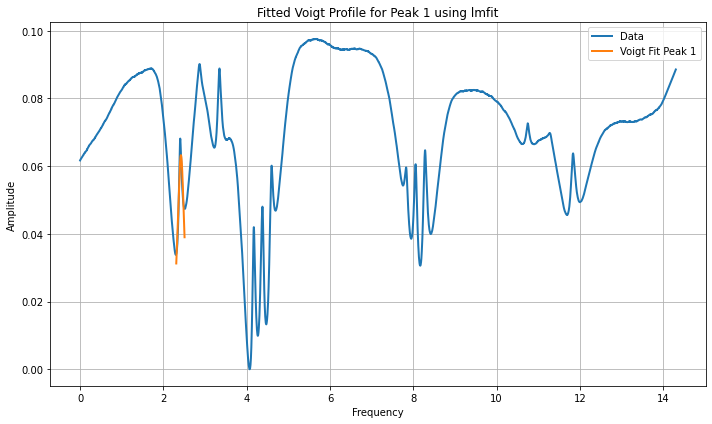

Fit results for Peak 2:
[[Model]]
    Model(voigt)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 5961
    # data points      = 140
    # variables        = 4
    chi-square         = 6.2724e-04
    reduced chi-square = 4.6120e-06
    Akaike info crit   = -1716.21588
    Bayesian info crit = -1704.44931
    R-squared          = 0.90644640
[[Variables]]
    amplitude:  46.7227766 +/- 522805.406 (1118951.92%) (init = 0.08885422)
    center:     3.35095570 +/- 8.0024e-04 (0.02%) (init = 3.345)
    sigmaL:     0.17313622 +/- 0.04206563 (24.30%) (init = 0.01)
    sigmaG:     3.9568e-04 +/- 4.43409324 (1120619.67%) (init = 0.01)
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigmaG) = -1.0000
    C(amplitude, sigmaL) = +0.9979
    C(sigmaL, sigmaG)    = -0.9979
    C(center, sigmaL)    = +0.2000
    C(amplitude, center) = +0.1903
    C(center, sigmaG)    = -0.1903


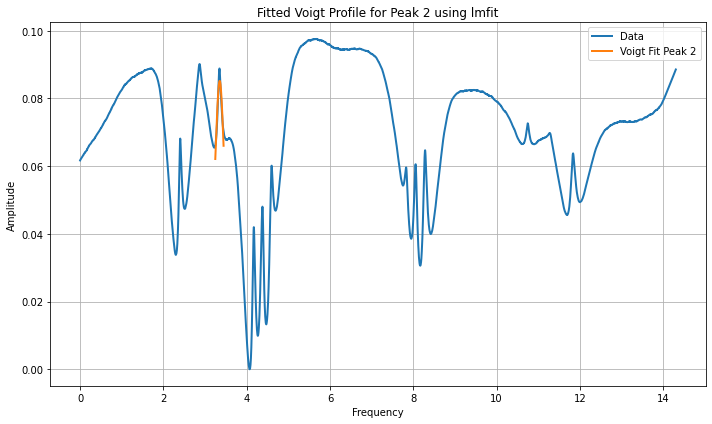

Fit results for Peak 3:
[[Model]]
    Model(voigt)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 72
    # data points      = 140
    # variables        = 4
    chi-square         = 0.00104353
    reduced chi-square = 7.6730e-06
    Akaike info crit   = -1644.95026
    Bayesian info crit = -1633.18369
    R-squared          = 0.95828849
[[Variables]]
    amplitude:  0.06124309 +/- 0.00728503 (11.90%) (init = 0.04197882)
    center:     4.17619193 +/- 5.5150e-04 (0.01%) (init = 4.165)
    sigmaL:     0.01642061 +/- 0.00350426 (21.34%) (init = 0.01)
    sigmaG:     0.02710241 +/- 0.00249831 (9.22%) (init = 0.01)
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigmaG) = -0.9894
    C(amplitude, sigmaL) = +0.9846
    C(sigmaL, sigmaG)    = -0.9641


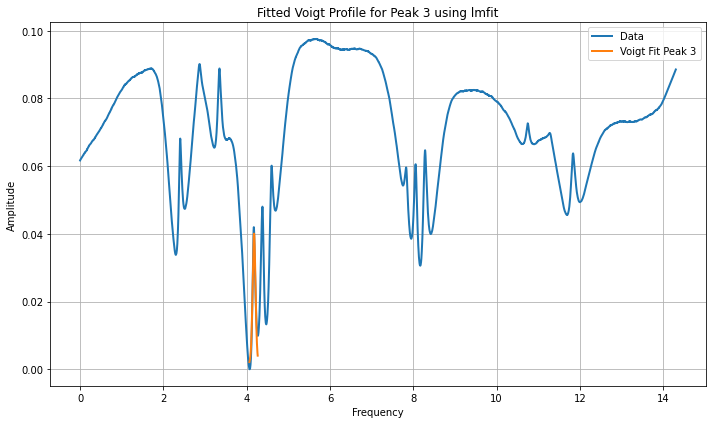

Fit results for Peak 4:
[[Model]]
    Model(voigt)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4711
    # data points      = 140
    # variables        = 4
    chi-square         = 2.4932e-04
    reduced chi-square = 1.8332e-06
    Akaike info crit   = -1845.38069
    Bayesian info crit = -1833.61412
    R-squared          = 0.98828897
[[Variables]]
    amplitude:  53.6632256 +/- 479214.516 (893003.56%) (init = 0.04803535)
    center:     4.37447824 +/- 2.7709e-04 (0.01%) (init = 4.38)
    sigmaL:     0.04968576 +/- 0.00138888 (2.80%) (init = 0.01)
    sigmaG:     5.4902e-05 +/- 0.49122423 (894734.07%) (init = 0.01)
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigmaG) = -1.0000
    C(amplitude, sigmaL) = +0.9462
    C(sigmaL, sigmaG)    = -0.9462


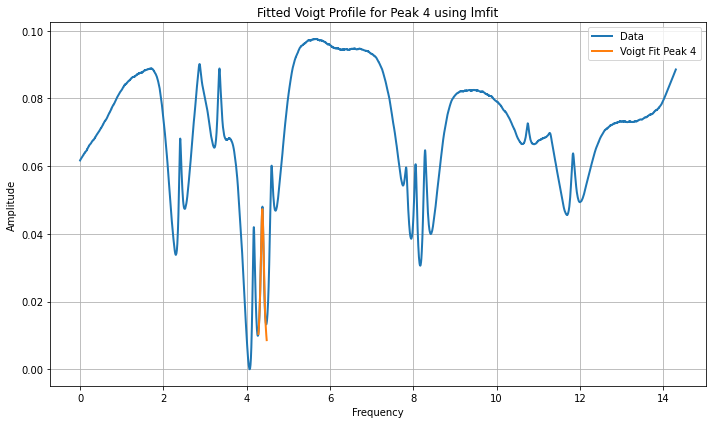

Fit results for Peak 5:
[[Model]]
    Model(voigt)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 10000
    # data points      = 139
    # variables        = 4
    chi-square         = 0.00180854
    reduced chi-square = 1.3397e-05
    Akaike info crit   = -1555.70948
    Bayesian info crit = -1543.97158
    R-squared          = 0.91712347
##  Warning: uncertainties could not be estimated:
[[Variables]]
    amplitude:  1.2305e-12 (init = 0.06015371)
    center:     4.62427048 (init = 4.6)
    sigmaL:    -4.40377807 (init = 0.01)
    sigmaG:     0.63752708 (init = 0.01)


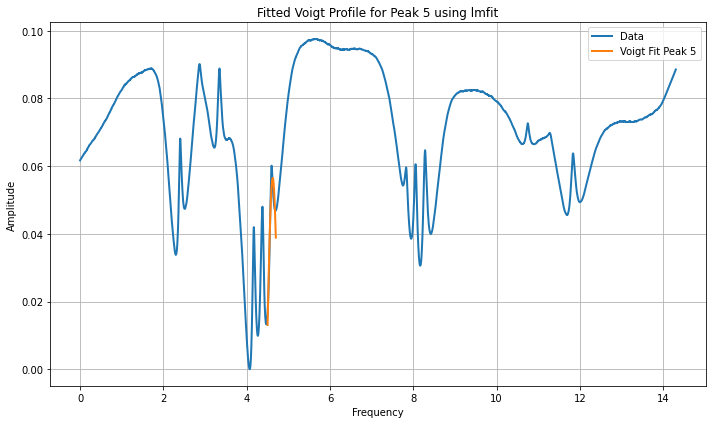

Fit results for Peak 6:
[[Model]]
    Model(voigt)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 10000
    # data points      = 140
    # variables        = 4
    chi-square         = 7.8283e-04
    reduced chi-square = 5.7561e-06
    Akaike info crit   = -1685.19376
    Bayesian info crit = -1673.42719
    R-squared          = 0.68572112
##  Warning: uncertainties could not be estimated:
[[Variables]]
    amplitude:  2.3346e-10 (init = 0.0596328)
    center:     7.77972315 (init = 7.8)
    sigmaL:    -6.60514769 (init = 0.01)
    sigmaG:     1.08203609 (init = 0.01)


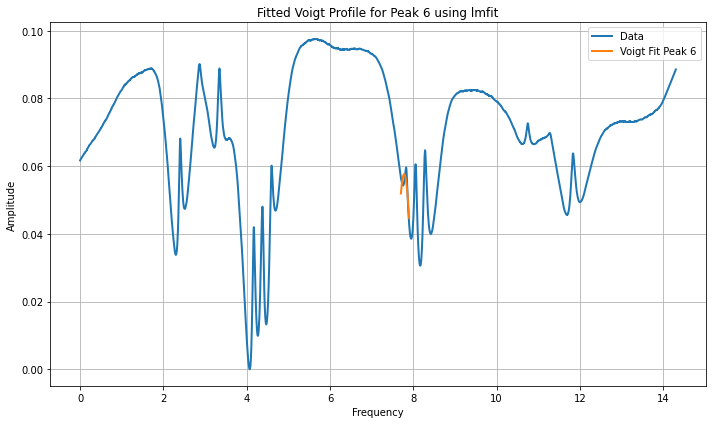

Fit results for Peak 7:
[[Model]]
    Model(voigt)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4298
    # data points      = 139
    # variables        = 4
    chi-square         = 9.7241e-04
    reduced chi-square = 7.2030e-06
    Akaike info crit   = -1641.95865
    Bayesian info crit = -1630.22076
    R-squared          = 0.90919782
[[Variables]]
    amplitude:  43.3455795 +/- 584480.981 (1348421.19%) (init = 0.06057201)
    center:     8.04560445 +/- 7.9882e-04 (0.01%) (init = 8.05)
    sigmaL:     0.10505724 +/- 0.01329798 (12.66%) (init = 0.01)
    sigmaG:     1.7298e-04 +/- 2.33749944 (1351345.18%) (init = 0.01)
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigmaG) = -1.0000
    C(amplitude, sigmaL) = +0.9898
    C(sigmaL, sigmaG)    = -0.9898


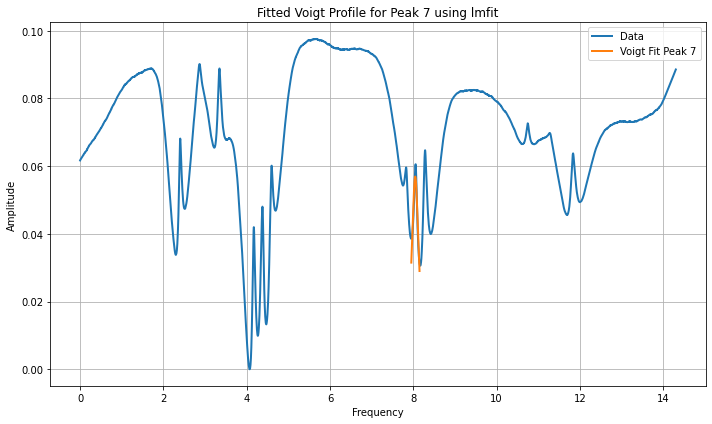

Fit results for Peak 8:
[[Model]]
    Model(voigt)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4836
    # data points      = 140
    # variables        = 4
    chi-square         = 7.0243e-04
    reduced chi-square = 5.1650e-06
    Akaike info crit   = -1700.36402
    Bayesian info crit = -1688.59745
    R-squared          = 0.95091206
[[Variables]]
    amplitude:  42.0629835 +/- 311650.322 (740913.50%) (init = 0.06470806)
    center:     8.29148197 +/- 6.3237e-04 (0.01%) (init = 8.28)
    sigmaL:     0.10325078 +/- 0.00889186 (8.61%) (init = 0.01)
    sigmaG:     1.9078e-04 +/- 1.41617147 (742324.06%) (init = 0.01)
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigmaG) = -1.0000
    C(amplitude, sigmaL) = +0.9870
    C(sigmaL, sigmaG)    = -0.9870
    C(center, sigmaL)    = +0.2269
    C(amplitude, center) = +0.2018
    C(center, sigmaG)    = -0.2018


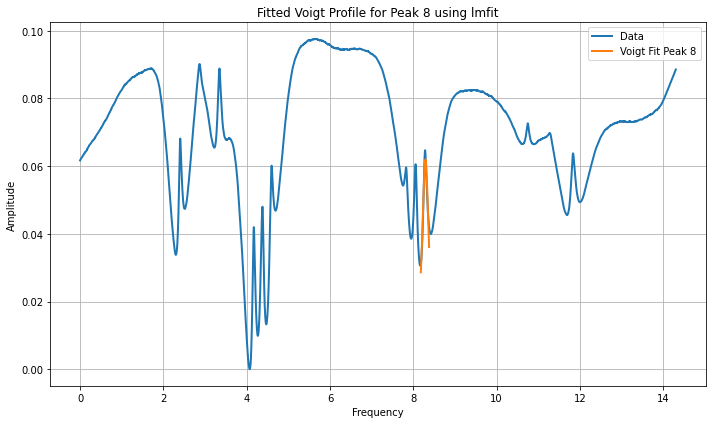

Fit results for Peak 9:
[[Model]]
    Model(voigt)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7539
    # data points      = 140
    # variables        = 4
    chi-square         = 1.2335e-04
    reduced chi-square = 9.0701e-07
    Akaike info crit   = -1943.89417
    Bayesian info crit = -1932.12760
    R-squared          = 0.77171191
[[Variables]]
    amplitude:  16.1553317 +/- 135953.506 (841539.55%) (init = 0.07266237)
    center:     10.7427960 +/- 0.00157603 (0.01%) (init = 10.73)
    sigmaL:     0.35508742 +/- 0.42872232 (120.74%) (init = 0.01)
    sigmaG:     0.00195551 +/- 16.4723675 (842358.21%) (init = 0.01)
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigmaG) = -1.0000
    C(amplitude, sigmaL) = +0.9998
    C(sigmaL, sigmaG)    = -0.9998
    C(center, sigmaL)    = +0.3222
    C(amplitude, center) = +0.3135
    C(center, sigmaG)    = -0.3135


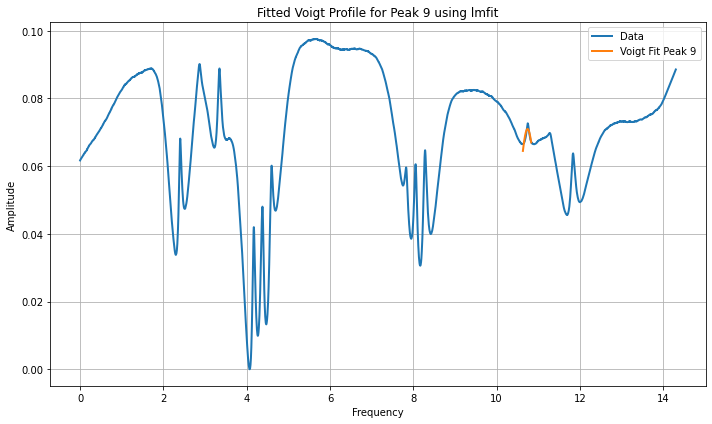

Fit results for Peak 10:
[[Model]]
    Model(voigt)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6724
    # data points      = 140
    # variables        = 4
    chi-square         = 2.1589e-04
    reduced chi-square = 1.5874e-06
    Akaike info crit   = -1865.53403
    Bayesian info crit = -1853.76746
    R-squared          = 0.93314988
[[Variables]]
    amplitude:  30.5388830 +/- 240195.808 (786524.54%) (init = 0.06378031)
    center:     11.8446827 +/- 6.6068e-04 (0.01%) (init = 11.84)
    sigmaL:     0.17712005 +/- 0.03778050 (21.33%) (init = 0.01)
    sigmaG:     4.5076e-04 +/- 3.55006121 (787577.56%) (init = 0.01)
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigmaG) = -1.0000
    C(amplitude, sigmaL) = +0.9981
    C(sigmaL, sigmaG)    = -0.9981
    C(center, sigmaL)    = +0.1737
    C(amplitude, center) = +0.1659
    C(center, sigmaG)    = -0.1659


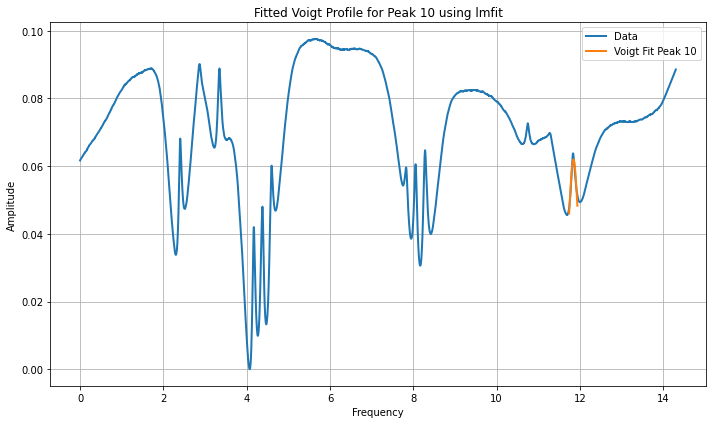

In [33]:
from lmfit import Model
from scipy.special import wofz


def voigt(x, amplitude, center, sigmaL, sigmaG):
    z = ((x - center) + 1j * sigmaL) / (sigmaG * np.sqrt(2))
    return amplitude * np.real(wofz(z))

peak_centers = [2.408, 3.345, 4.165, 4.38, 4.6, 7.8, 8.05, 8.28, 10.73, 11.84]
peak_indices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]  
roi_width = 0.1  


fit_results = []

for idx, center in enumerate(peak_centers):
   
    roi_indices = (x >= center - roi_width) & (x <= center + roi_width)
    roi_x = x[roi_indices]
    roi_residuals = residuals[roi_indices]


    initial_amplitude = max(roi_residuals)
    initial_center = center
    initial_sigmaL = 0.01  
    initial_sigmaG = 0.01  

    peak_model = Model(voigt)
    peak_model.set_param_hint('amplitude', value=initial_amplitude)
    peak_model.set_param_hint('center', value=initial_center)
    peak_model.set_param_hint('sigmaL', value=initial_sigmaL)
    peak_model.set_param_hint('sigmaG', value=initial_sigmaG)

    peak_fit = peak_model.fit(roi_residuals, x=roi_x)

    print(f"Fit results for Peak {idx+1}:")
    print(peak_fit.fit_report())

    fit_results.append(peak_fit)

    
    plt.figure(figsize=(10, 6))
    plt.plot(x, residuals, label='Data', linewidth=2)
    plt.plot(roi_x, peak_fit.best_fit, label=f'Voigt Fit Peak {idx+1}', linewidth=2)
    plt.xlabel('Frequency')
    plt.ylabel('Amplitude')
    plt.title(f'Fitted Voigt Profile for Peak {idx+1} using lmfit')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()




Fit results for Peak 1:
[[Model]]
    Model(voigt)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 3848
    # data points      = 140
    # variables        = 4
    chi-square         = 0.00181349
    reduced chi-square = 1.3334e-05
    Akaike info crit   = -1567.58018
    Bayesian info crit = -1555.81361
    R-squared          = 0.87171938
[[Variables]]
    amplitude:  27.2327227 +/- 141671.323 (520224.60%) (init = 0.06815024)
    center:     2.42029084 +/- 0.00107501 (0.04%) (init = 2.408)
    sigmaL:     0.11042933 +/- 0.01706420 (15.45%) (init = 0.01)
    sigmaG:     3.2151e-04 +/- 1.67657206 (521471.07%) (init = 0.01)
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigmaG) = -1.0000
    C(amplitude, sigmaL) = +0.9890
    C(sigmaL, sigmaG)    = -0.9890
    C(center, sigmaL)    = +0.2450
    C(amplitude, center) = +0.2187
    C(center, sigmaG)    = -0.2187
Fit results for Peak 2:
[[Model]]
    Model(voigt)
[[Fit Statistics]]
    # 

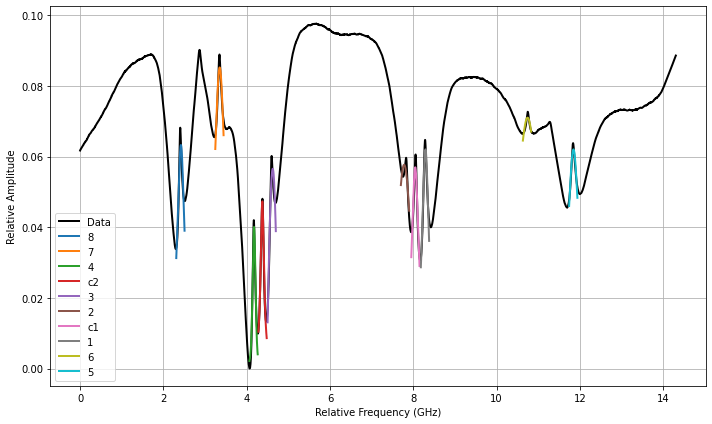

In [30]:

plt.figure(figsize=(10, 6))

plt.plot(x, residuals, color='black', label='Data', linewidth=2)
peak_labels = ['8', '7', '4','c2', '3', '2','c1','1','6', '5']

for idx, center in enumerate(peak_centers):
  
    roi_indices = (x >= center - roi_width) & (x <= center + roi_width)
    roi_x = x[roi_indices]
    roi_residuals = residuals[roi_indices]

    initial_amplitude = max(roi_residuals)
    initial_center = center
    initial_sigmaL = 0.01  
    initial_sigmaG = 0.01  

    peak_model = Model(voigt)
    peak_model.set_param_hint('amplitude', value=initial_amplitude)
    peak_model.set_param_hint('center', value=initial_center)
    peak_model.set_param_hint('sigmaL', value=initial_sigmaL)
    peak_model.set_param_hint('sigmaG', value=initial_sigmaG)
 
    peak_fit = peak_model.fit(roi_residuals, x=roi_x)

    print(f"Fit results for Peak {idx+1}:")
    print(peak_fit.fit_report())
    
    fit_results.append(peak_fit)

    color = plt.cm.get_cmap('tab10')(idx)  

    plt.plot(roi_x, peak_fit.best_fit, linewidth=2, color=color, label = peak_labels[idx])

plt.xlabel('Relative Frequency (GHz)')
plt.ylabel('Relative Amplitude')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [32]:
peak_fit.fit_report()

'[[Model]]\n    Model(voigt)\n[[Fit Statistics]]\n    # fitting method   = leastsq\n    # function evals   = 6724\n    # data points      = 140\n    # variables        = 4\n    chi-square         = 2.1589e-04\n    reduced chi-square = 1.5874e-06\n    Akaike info crit   = -1865.53403\n    Bayesian info crit = -1853.76746\n    R-squared          = 0.93314988\n[[Variables]]\n    amplitude:  30.5388830 +/- 240195.808 (786524.54%) (init = 0.06378031)\n    center:     11.8446827 +/- 6.6068e-04 (0.01%) (init = 11.84)\n    sigmaL:     0.17712005 +/- 0.03778050 (21.33%) (init = 0.01)\n    sigmaG:     4.5076e-04 +/- 3.55006121 (787577.56%) (init = 0.01)\n[[Correlations]] (unreported correlations are < 0.100)\n    C(amplitude, sigmaG) = -1.0000\n    C(amplitude, sigmaL) = +0.9981\n    C(sigmaL, sigmaG)    = -0.9981\n    C(center, sigmaL)    = +0.1737\n    C(amplitude, center) = +0.1659\n    C(center, sigmaG)    = -0.1659'

In [25]:
6.6068e-04 - 8.0024e-04

-0.00013956000000000005

In [24]:
11.8446827- 3.35095570

8.493727

In [26]:
8.493727/2

4.2468635

In [27]:
2.42029084 - 10.7427960 


-8.32250516